In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import math
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from xgboost.sklearn import XGBClassifier#XGBoost
from sklearn.ensemble import AdaBoostClassifier#AdaBoost
from sklearn.ensemble import GradientBoostingClassifier#GBDT
from sklearn import metrics
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import roc_curve

In [12]:
# Collecting Data
train_data = pd.read_csv('mytrain.csv') 
test_data=pd.read_csv('mytest.csv') 
test_Lable=pd.read_csv('mygender.csv') 
total_data=pd.concat([train_data,test_data],ignore_index=True,sort=False)
testLable=list(map(int,test_Lable['Survived']))
t=test_Lable.loc[:,"Survived"]

In [13]:
total_data 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
print("total data count:",total_data.shape) 
print("training data count:", train_data.shape)
print("test data count:", test_data.shape)

total data count: (1309, 12)
training data count: (891, 12)
test data count: (418, 11)


In [15]:
print(total_data.columns)  # 

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [16]:
# the number of fields
print("total data info:",total_data.info()) 
print("training data info:",train_data.info())
print("testing data info:",test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
total data info: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int

In [17]:
total_data.isnull().sum() #missing data

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [18]:
# Exploratory Data Analysis
## Numerical Characteristics
total_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Text(0.5, 1.0, 'Survival Rate')

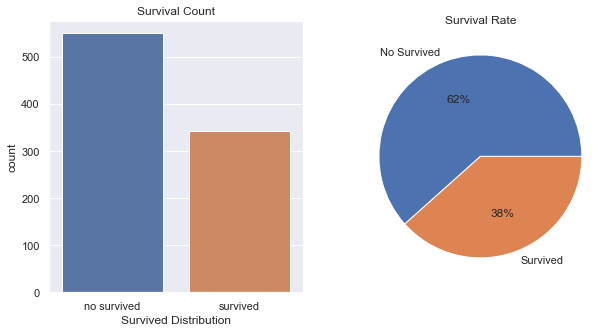

In [19]:
## Survival Info
train_survived = train_data["Survived"].sum()
train_no_survived = 891 - train_survived
train_data["Survived_cat"] = train_data["Survived"].map({0:"no survived",1:"survived"})
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(x="Survived_cat",data=train_data)
plt.xlabel("Survived Distribution"),plt.title("Survival Count")
plt.subplot(122)
plt.pie([train_no_survived,train_survived],labels=["No Survived","Survived"],autopct="%1.0f%%")
plt.title("Survival Rate")

Placss Count:


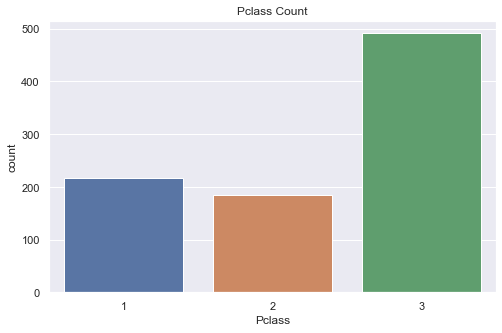

relationship between Pclass and Survival Rate:


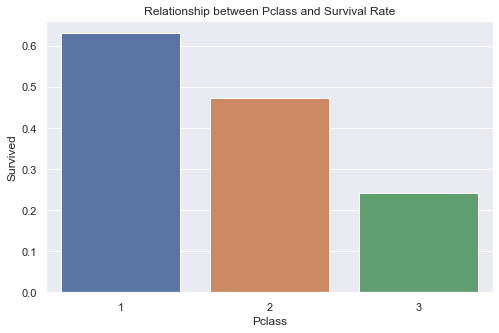

In [20]:
# Pclass info
print("Placss Count:")
train_data[["Pclass","Name"]].groupby(["Pclass"]).count()
plt.figure(figsize=(8,5))
sns.countplot(x="Pclass",data=train_data),plt.title("Pclass Count")
plt.show()
# relationship between Pclass and Survival Rate
print("relationship between Pclass and Survival Rate:")
plt.figure(figsize=(8,5))
sns.barplot(data=train_data,x="Pclass",y="Survived",ci=None),plt.title("Relationship between Pclass and Survival Rate")
plt.show()

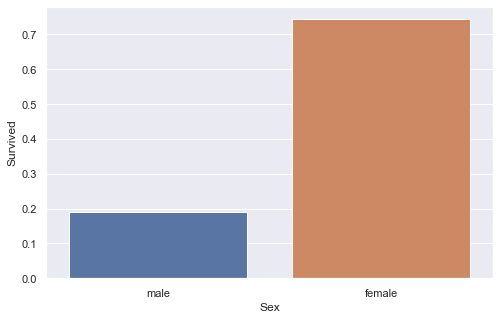

In [21]:
## Relationship between Sex and Survival Rate
plt.figure(figsize=(8,5))
sns.barplot(data=train_data,x="Sex",y="Survived",ci=None)
plt.show()

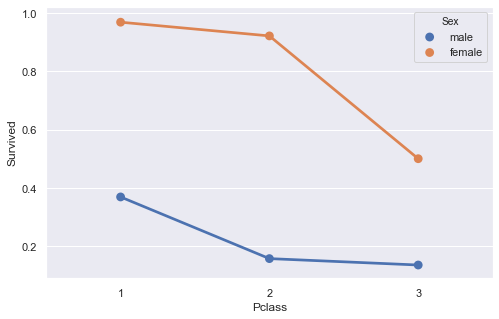

In [22]:
## Relationships of Sex, Pclass and Survival Rate
plt.figure(figsize=(8,5))
sns.pointplot(data = train_data, x="Pclass",y="Survived",hue="Sex",ci=None)
plt.show()

Conclusion:
1. the survival rate of women is larger than that of men;
2. The survival rate of women in the first and second classes is similar, and much greater than that of the third class
3. The survival rate of men in the first class is much greater than that in the second and third classes, and the survival rate of men in the second and third classes is close

(0.34, 16.336]      100
(16.336, 32.252]    346
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeGroup, dtype: int64


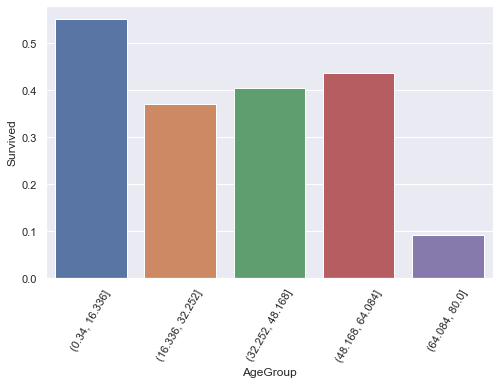

In [23]:
## Relationship between Age and Survival Rate
train_data["AgeGroup"]=pd.cut(train_data["Age"],5) # Cutting age into five ranges
print(train_data.AgeGroup.value_counts(sort=False)) # the number of people in each range
plt.figure(figsize=(8,5))
sns.barplot(data=train_data,x="AgeGroup",y="Survived",ci=None)
plt.xticks(rotation=60)
plt.show()

Conclusion: 
1. The survival rate of adolescents is higher; 
2. Seniors over 64 years old have the lowest survival rate

Text(18.74135937500001, 0.5, 'Density')

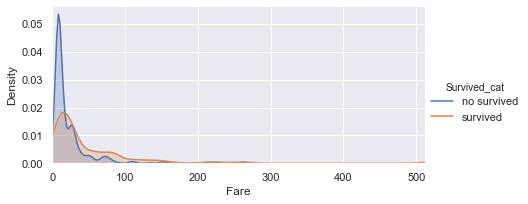

In [24]:
## Relationship bewteen Fare and Survival Rate
facet=sns.FacetGrid(train_data,hue="Survived_cat",aspect=2)
facet.map(sns.kdeplot,"Fare",shade=True)
facet.set(xlim=(0,train_data["Fare"].max()))
facet.add_legend()
plt.xlabel("Fare")
plt.ylabel("Density")

(-0.512, 170.776]     871
(170.776, 341.553]     17
(341.553, 512.329]      3
Name: FareGroup, dtype: int64


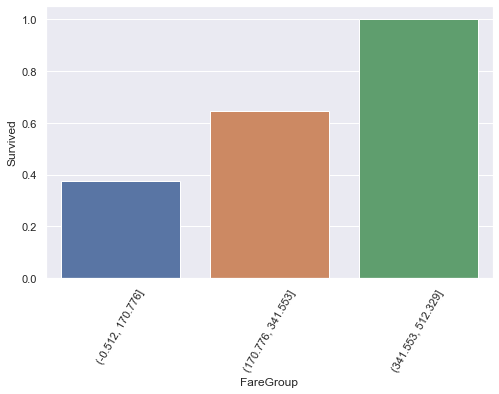

In [25]:
train_data["FareGroup"]=pd.cut(train_data["Fare"],3) # cutting fare into five ranges
print(train_data.FareGroup.value_counts(sort=False)) # the number of people in each range
plt.figure(figsize=(8,5))
sns.barplot(data=train_data,x="FareGroup",y="Survived",ci=None)
plt.xticks(rotation=60)
plt.show()

Conclusion: The higher the ticket price, the greater the survival rate.

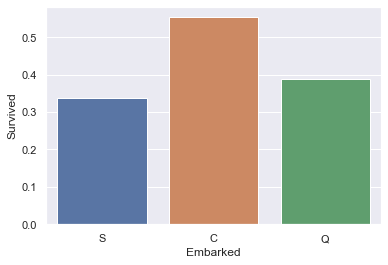

In [16]:
## The relationship between the boarding dock and the survival rate
sns.barplot(x="Embarked",y="Survived",data=train_data,ci=None)
plt.show()

Conclusion: C has the highest survival rate, followed by Q, and S has the lowest survival rate.

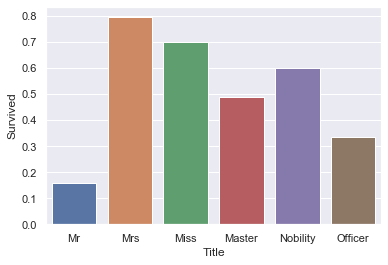

In [26]:
## Title of Name
train_data["Title"]=train_data["Name"].apply(lambda x:x.split(",")[1].split(".")[0].strip())
Title_Dict={}
Title_Dict.update(dict.fromkeys(["Mr"],"Mr"))
Title_Dict.update(dict.fromkeys(["Mme","Ms","Mrs"],"Mrs"))
Title_Dict.update(dict.fromkeys(["Mlle","Miss",],"Miss"))
Title_Dict.update(dict.fromkeys(["Jonkheer","Lady","the Countess","Sir","Don","Dona"],"Nobility"))
Title_Dict.update(dict.fromkeys(["Capt","Col","major"],"Officer"))
Title_Dict.update(dict.fromkeys(["Master","Dr","Rev"],"Master"))
train_data["Title"]=train_data["Title"].map(Title_Dict)
sns.barplot(x="Title",y="Survived",data=train_data,ci=None)

Conclusion: passengers with the title of Mrs. have the highest survival rate and Mr. have the lowest survival rate

1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: Family_size, dtype: int64
else     62
1       537
2-4     292
Name: Family_type, dtype: int64


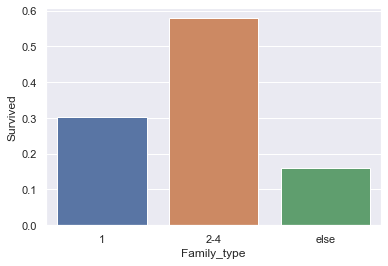

In [27]:
# Relationship between Family Size and Survival Rate
train_data["Family_size"]=train_data["Parch"]+train_data["SibSp"]+1
def Family_type(s):
    if (s>=2)&(s<=4):
        return "2-4"
    elif (s==1): 
        return "1"
    else:
        return "else"
train_data['Family_type']=train_data['Family_size'].map(Family_type)
sns.barplot(x='Family_type',y='Survived',data=train_data,order=["1","2-4","else"],ci=None)
print(train_data.Family_size.value_counts(sort=False)) 
print(train_data.Family_type.value_counts(sort=False)) 

Conclusion: Families with 2-4 have the highest survival rate

### Data Preprocessing

In [28]:
train_data = pd.read_csv('mytrain.csv')
test_data=pd.read_csv('mytest.csv') 
test_Lable=pd.read_csv('mygender.csv') 
total_data=pd.concat([train_data,test_data],ignore_index=True,sort=False)
testLable=list(map(int,test_Lable['Survived']))
t=test_Lable.loc[:,"Survived"]

Invalid Feature

In [29]:
train_data=train_data.drop(['PassengerId'],axis=1)
test_data=test_data.drop(['PassengerId'],axis=1)
train_data=train_data.drop(['Name'],axis=1)
test_data=test_data.drop(['Name'],axis=1)
train_data=train_data.drop(['Cabin'],axis=1)
test_data=test_data.drop(['Cabin'],axis=1)
train_data=train_data.drop(['Ticket'],axis=1)
test_data=test_data.drop(['Ticket'],axis=1)
trainLen=len(train_data)
testLen=len(test_data)

Missing Data

In [30]:
print(total_data.isnull().sum())
print("missing information of training dataset:")
print(train_data.isnull().sum())
print("missing information of testing dataset:")
print(test_data.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64
missing information of training dataset:
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64
missing information of testing dataset:
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64


Missing Data of Embarked (fill with mode)

In [32]:
print(train_data.Embarked.mode())

0    S
dtype: object


In [33]:
total_data["Embarked"].fillna("S",inplace=True)
train_data["Embarked"].fillna("S",inplace=True)
test_data["Embarked"].fillna("S",inplace=True)

Missing Data of Fare（fill with mode）

In [34]:
print(total_data['Fare'].dropna().mode()[0])

8.05


In [35]:
total_data['Fare']=total_data['Fare'].fillna(8.05)
train_data['Fare']=train_data['Fare'].fillna(8.05)
test_data['Fare']=test_data['Fare'].fillna(8.05)

Missing Data of Age（Gradient Boosting Regression + MLP Neural Network）

In [36]:
train_data.dropna(axis=0,inplace=True) #delete data with age=NA
trainLen=len(train_data)
testLen=len(test_data)

In [37]:
#Seperate label and feature of training dataset
trainLable= list(map(int,train_data['Survived']))
train_data=train_data.drop(['Survived'],axis=1)

In [39]:
# Combine training dataset and testing dataset and coding
combineData=train_data.append(test_data)

def getReview(data,changeColumns):
    ResultReview=[]
    listReview=data
    le = LabelEncoder()
    for column in changeColumns:
        listData=[]
        for review in data[column]:
            listData.append(review)
        listReview[column]=le.fit_transform(listData)
    #向量化（需要一个个的append）：
    for i in range(len(data)):
        rowVec=[]
        for j in range(0,len(data.columns)):
            rowVec.append(listReview.iloc[i,j])
        ResultReview.append(rowVec)
    return ResultReview
# Vectorization
changeColumns=['Sex','Embarked']
combine_Review=np.array(getReview(combineData,changeColumns))
scl = MinMaxScaler()
combineReview=scl.fit_transform(combine_Review)
trainReview=combineReview[0:trainLen]
testReview=combineReview[trainLen:trainLen+testLen]

In [40]:
#get values where age is null
isNull=test_data['Age'].isnull().get_values()
listAgeTrain=[]
listAgeTest=[]
for elem in trainReview:listAgeTrain.append(elem)
for i in range(0,len(isNull)):
    if isNull[i]==False:listAgeTrain.append(testReview[i])
    else: listAgeTest.append(testReview[i])
ageTrain = np.array(listAgeTrain)
ageTest=np.array(listAgeTest)
ageLable=ageTrain[:,2]
ageTrain=np.delete(ageTrain,2,axis=1)
ageTest=np.delete(ageTest,2,axis=1)

Predict Age of testing dataset:
0 th training:
1 th training:
2 th training:


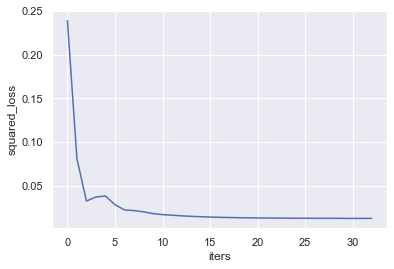

[0.3423988543328505, 0.44658335759997775, 0.24088033600276257, 0.24927820685961885, 0.3073873964800451, 0.35041506916016313, 0.5481089505451916, 0.3741901580568274, 0.3825969492094088, 0.3343150225510801, 0.38989489485799694, 0.3558588732232912, 0.3423988543328505, 0.45357818270927147, 0.2756110535947371, 0.3058742133733244, 0.3300568767002348, 0.3558588732232912, 0.3741901580568274, 0.3741901580568274, 0.32309826062796115, 0.296199662536157, 0.32642701218973164, 0.3257717490611587, 0.3741901580568274, 0.2557967416998896, 0.38274439606308125, 0.2854152979385662, 0.5165306260075807, 0.5481089505451916, 0.33688034406172407, 0.27897936858649036, 0.3921807529893173, 0.4867849083722022, 0.3572900353393604, 0.3180396392581042, 0.3741901580568274, 0.09892679057998836, 0.5359739846951838, 0.30313876640626136, 0.31778097461196325, 0.46376935829564997, 0.35667194445129663, 0.2884365619937423, 0.3558588732232912, 0.25286434119995765, 0.3058742133733244, 0.357063997191111, 0.33646040058325216, 0.2

In [41]:
#Predicting Age：
print('Predict Age of testing dataset:')
model1 = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                                  learning_rate=0.03, loss='huber', max_depth=15,
                                  max_features='sqrt', max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=10, min_samples_split=40,
                                  min_weight_fraction_leaf=0.0, n_estimators=300,
                                  presort='auto', random_state=10, subsample=0.8, verbose=0,
                                  warm_start=False)
model2=MLPRegressor(activation='tanh', learning_rate='adaptive')

age_sum = []
for i in range(0,3):
    print(i,'th training:')
    model1.fit(ageTrain,ageLable)# training
    age_model1 = model1.predict(ageTest)# predicting
    model2.fit(ageTrain,ageLable)# training
    age_model2 = model2.predict(ageTest)#predicting
    age_sum.append(age_model1*0.5+age_model2*0.5)
# MLPRegressor loss function
plt.figure()
plt.plot(model2.loss_curve_)
plt.xlabel("iters")
plt.ylabel(model2.loss)
plt.show()

age_model=[]
for i in range(len(ageTest)):
    asum=0
    for j in range(0,3):
        asum=asum+age_sum[j][i]
    age_model.append(asum/3)
print(age_model)

In [42]:
# Fill Missing Data of Age
#find the location of missing data
nullIndex=[]
for i in range(0,len(isNull)):
    if isNull[i]==True:nullIndex.append(i)
# fill data
for i in range(0,len(nullIndex)):
    testReview[nullIndex[i],2]=age_model[i]

In [43]:
print(trainReview)

[[1.         1.         0.27345609 ... 0.         0.01415106 1.        ]
 [0.         0.         0.473882   ... 0.         0.13913574 0.        ]
 [1.         0.         0.32356257 ... 0.         0.01546857 1.        ]
 ...
 [0.         0.         0.23587624 ... 0.         0.0585561  1.        ]
 [0.         1.         0.32356257 ... 0.         0.0585561  0.        ]
 [1.         1.         0.39872228 ... 0.         0.01512699 0.5       ]]


### Construct Model

In [47]:
print('Random Forest')
RF = RandomForestClassifier(max_depth=None)
RF.fit(trainReview, trainLable)
print('Predict:')
pred_RF = RF.predict(testReview)
RF_score = metrics.accuracy_score(testLable, pred_RF)
RF_matrix = metrics.confusion_matrix(testLable, pred_RF)
print('Accuracy\n', RF_score)
print('Confusion Matrix\n', RF_matrix)
print('AUC\n',roc_auc_score(testLable, pred_RF))

Random Forest
Predict:
Accuracy
 0.7894736842105263
Confusion Matrix
 [[225  41]
 [ 47 105]]
AUC
 0.7683270676691729


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Improtance of Each Feature：[0.09317088 0.20925459 0.29044673 0.0552979  0.04097996 0.28155893
 0.02929101] 
Feature Ranking:
 1)Age                            0.290447
 2)Fare                           0.281559
 3)Sex                            0.209255
 4)Pclass                         0.093171
 5)SibSp                          0.055298
 6)Parch                          0.040980
 7)Embarked                       0.029291


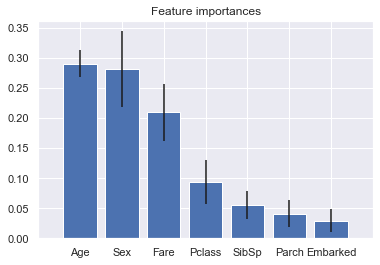

In [49]:
print('Improtance of Each Feature：%s '%RF.feature_importances_)
std=np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = np.argsort(RF.feature_importances_)[::-1]
print('Feature Ranking:')
for f in range(min(20,train_data.shape[1])):
    print("%2d)%-*s %f"%(f+1, 30, train_data.columns[indices[f]],RF.feature_importances_[indices[f]]))
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_data.shape[1]), RF.feature_importances_[indices], color='b', yerr=std[indices], align="center")
plt.xticks(range(train_data.shape[1]),["Age","Sex","Fare","Pclass","SibSp","Parch","Embarked"])
plt.xlim([-1, train_data.shape[1]])
plt.show()

In [50]:
print('XGBoost')
XG = XGBClassifier(use_label_encoder=True)
XG.fit(trainReview, trainLable)

pred_XG = XG.predict(testReview)
XG_score = metrics.accuracy_score(testLable, pred_XG)
XG_matrix = metrics.confusion_matrix(testLable, pred_XG)
print('Predict:')
print('Accuracy\n', XG_score)
print('Confusion Matrix \n', XG_matrix)
print('AUC\n',roc_auc_score(testLable, pred_XG))

XGBoost
[00:43:00] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Predict:
Accuracy
 0.8086124401913876
Confusion Matrix 
 [[229  37]
 [ 43 109]]
AUC
 0.7890037593984962


C:\Users\ASUS\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [51]:
print('AdaBoost')
ADA = AdaBoostClassifier(base_estimator=None,random_state=None)
ADA.fit(trainReview, trainLable)
print('Predict:')
pred_ADA = ADA.predict(testReview)
ADA_score = metrics.accuracy_score(testLable, pred_ADA)
ADA_matrix = metrics.confusion_matrix(testLable, pred_ADA)
print('Accuracy\n', ADA_score)
print('Condusion Matrix\n', ADA_matrix)
print('AUC\n',roc_auc_score(testLable, pred_ADA))

AdaBoost
Predict:
Accuracy
 0.8899521531100478
Condusion Matrix
 [[240  26]
 [ 20 132]]
AUC
 0.8853383458646615


In [52]:
print('GBDT')
GBDT = GradientBoostingClassifier(random_state=None)
GBDT.fit(trainReview, trainLable)
print('预测:')
pred_GBDT = GBDT.predict(testReview)
GBDT_score = metrics.accuracy_score(testLable, pred_GBDT)
GBDT_matrix = metrics.confusion_matrix(testLable, pred_GBDT)
print('Accuracy\n', GBDT_score)
print('Confusion Matrix\n', GBDT_matrix)
print('AUC\n',roc_auc_score(testLable, pred_GBDT))

GBDT
预测:
Accuracy
 0.8732057416267942
Confusion Matrix
 [[245  21]
 [ 32 120]]
AUC
 0.8552631578947368


In [53]:
print('Logistic Regression:')
LR =LogisticRegression()
LR.fit(trainReview, trainLable)
print('Predict:')
pred_LR = LR.predict(testReview)
LR_score = metrics.accuracy_score(testLable, pred_LR)
LR_matrix = metrics.confusion_matrix(testLable, pred_LR)
print('Accuracy\n', LR_score)
print('Confusion Matrix\n', LR_matrix)
print('AUC\n', roc_auc_score(testLable, pred_LR))

Logistic Regression:
Predict:
Accuracy
 0.9545454545454546
Confusion Matrix
 [[254  12]
 [  7 145]]
AUC
 0.9544172932330828


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
print("SVM")
SVM = LinearSVC()
SVM.fit(trainReview, trainLable)
print('Predict:')
pred_SVM = SVM.predict(testReview)
SVM_score = metrics.accuracy_score(testLable, pred_SVM)
SVM_matrix = metrics.confusion_matrix(testLable, pred_SVM)
print('Accuracy\n', SVM_score)
print('Condusion Matrix\n', SVM_matrix)
print('AUC\n', roc_auc_score(testLable, pred_SVM))

SVM
Predict:
Accuracy
 0.9545454545454546
Condusion Matrix
 [[254  12]
 [  7 145]]
AUC
 0.9544172932330828


In [55]:
data_train=pd.DataFrame(trainReview[:])
data_test=pd.DataFrame(testReview[:])
data_target = pd.DataFrame(trainLable[:])
data_target = data_target.values.reshape(len(data_target),1)
test_lable = np.reshape(test_Lable.Survived.values.astype(np.float32),(418,1))

In [56]:
import tensorflow as tf
x = tf.placeholder("float",shape = [None,7])
y = tf.placeholder("float",shape = [None,1])
weight = tf.Variable(tf.random_normal([7,1]))
bias = tf.Variable(tf.random_normal([1]))
output = tf.matmul(x,weight) + bias
pred = tf.cast(tf.nn.sigmoid(output) > 0.5,tf.float32)
# Define Loss Function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y,logits = output))
# Minimize the Loss with Adam Optimizer
train_step = tf.train.AdamOptimizer(0.003).minimize(loss)
#Accuracy
accuracy = tf.reduce_mean(tf.cast(tf.equal(pred,y),tf.float32))
sess=tf.Session()
sess.run(tf.global_variables_initializer())
# Start Training
sess = tf.Session()
# Imitialize Parameters
sess.run(tf.global_variables_initializer())
loss_train = []
train_acc = []
test_acc = []
for i in range(2000):
    #To prevent overfitting, the data indexes are out-of-order
    index = np.random.permutation(len(data_target))
    data_train = data_train.loc[index]
    data_test = data_test.loc[index]
    for n in range(len(data_target) // 100 + 1):
        batch_xs = data_train[n * 100:n * 100 + 100]
        batch_ys = data_target[n * 100:n * 100 + 100]
        sess.run(train_step,feed_dict = {x:batch_xs,y:batch_ys})
    if i % 100 == 0:
        loss_temp = sess.run(loss,feed_dict = {x:batch_xs,y:batch_ys})
        loss_train.append(loss_temp)
        train_acc_temp = sess.run(accuracy,feed_dict = {x:batch_xs,y:batch_ys})
        train_acc.append(train_acc_temp)
        test_acc_temp = sess.run(accuracy,feed_dict = {x:data_test[:418],y:test_lable})
        test_acc.append(test_acc_temp)
        print(loss_temp,train_acc_temp,test_acc_temp)
print("Neural Network")
print('Loss\n',loss_temp)
print("Accuracy in testing dataset\n",test_acc_temp)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


1.8902422 0.35714287 0.46650717
0.6352907 0.78571427 0.6052632
0.58124936 0.71428573 0.62918663
0.6444019 0.64285713 0.6363636
0.6420699 0.64285713 0.6363636
0.6569892 0.64285713 0.6363636
0.65464884 0.64285713 0.6363636
0.65291893 0.64285713 0.6363636
0.6518801 0.64285713 0.6363636
0.6511489 0.64285713 0.6363636
0.653644 0.64285713 0.6363636
0.6589082 0.64285713 0.6363636
0.6608357 0.64285713 0.6363636
0.65627825 0.64285713 0.6363636
0.64351547 0.64285713 0.6363636
0.65711087 0.64285713 0.6363636
0.65417755 0.64285713 0.6363636
0.66167164 0.64285713 0.6363636
0.6577128 0.64285713 0.6363636
0.65667707 0.64285713 0.6363636
Neural Network
Loss
 0.65667707
Accuracy in testing dataset
 0.6363636
